In [1]:
import pandas as pd, numpy as np, matplotlib, matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from statsmodels.stats.weightstats import DescrStatsW
import seaborn as sns
import math

In [2]:
# Loading in the survey data
cis_df_2017 = pd.read_csv('CIS-72M0003-E-2017_F1.csv')
cis_df_2015 = pd.read_csv('CIS-72M0003-E-2015_F1.csv')
scf_df_1982 = pd.read_csv('scf-13M00004-E-1982-ind_F1.csv')
scf_df_1991 = pd.read_csv('scf-13M00004-E-1991-ind_F1.csv')

In [3]:
scf_df_1982

,IDNUM,GEOCODE,AREA,RESID,WEIGHT,WAGSAL,INCSELF,TOTEARN,INCINV,FAMYTH,...,UNEMDUR,WRKTYPE,WHYNOTLK,WKSWRK,WRKFTPT,WRKFTLSS,WKSLOOK,STRECHES,ACTIV,REVWEIG
0,1,10,3,1,0,25607,0,25607,337,0,...,0,5,7,52,1,1,0,4,6,132
1,2,10,3,1,0,0,0,0,0,0,...,0,5,7,0,3,3,0,4,3,110
2,3,10,3,1,0,0,0,0,0,0,...,0,5,7,0,3,3,0,4,2,85
3,4,10,3,1,0,2080,0,2080,0,575,...,0,5,7,16,2,2,36,1,6,65
4,5,10,3,1,0,18050,0,18050,0,288,...,0,5,7,50,1,1,2,1,6,46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79512,79513,59,4,1,0,0,0,0,0,0,...,0,5,7,0,3,3,0,4,2,162
79513,79514,59,4,1,0,0,0,0,68,0,...,0,5,7,52,2,2,0,4,6,179
79514,79515,59,4,1,0,0,0,0,0,0,...,0,5,7,0,3,3,0,4,2,161
79515,79516,59,4,1,0,18352,0,18352,0,0,...,0,5,7,52,1,1,0,4,6,169


In [4]:
cpi_df = pd.read_csv('cpi_annual.csv')

In [5]:
cpi_df # The consumer price index

,REF_DATE,GEO,DGUID,Products and product groups,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS
0,1982,Canada,2016A000011124,All-items,2002=100,17,units,0,v41693271,2.200,54.9,NaN,NaN,NaN,1
1,1983,Canada,2016A000011124,All-items,2002=100,17,units,0,v41693271,2.200,58.1,NaN,NaN,NaN,1
2,1984,Canada,2016A000011124,All-items,2002=100,17,units,0,v41693271,2.200,60.6,NaN,NaN,NaN,1
3,1985,Canada,2016A000011124,All-items,2002=100,17,units,0,v41693271,2.200,63.0,NaN,NaN,NaN,1
4,1986,Canada,2016A000011124,All-items,2002=100,17,units,0,v41693271,2.200,65.6,NaN,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
580,2016,Canada,2016A000011124,Services,2002=100,17,units,0,v41693528,2.282,138.9,NaN,NaN,NaN,1
581,2017,Canada,2016A000011124,Services,2002=100,17,units,0,v41693528,2.282,142.0,NaN,NaN,NaN,1
582,2018,Canada,2016A000011124,Services,2002=100,17,units,0,v41693528,2.282,145.8,NaN,NaN,NaN,1
583,2019,Canada,2016A000011124,Services,2002=100,17,units,0,v41693528,2.282,149.2,NaN,NaN,NaN,1


In [6]:
cpi_df = cpi_df[cpi_df['Products and product groups'] == 'All-items'] # only check the aggregate cpi value
cpi_df = cpi_df[['REF_DATE', 'VALUE']]

In [7]:
# The reference date defaults to 2002, but we would rather have it be 2020

In [8]:
cpi_df['VALUE_2020'] = ( cpi_df['VALUE'] / cpi_df.iloc[-1]['VALUE'] ) * 100

In [9]:
cpi_df

,REF_DATE,VALUE,VALUE_2020
0,1982,54.9,40.072993
1,1983,58.1,42.408759
2,1984,60.6,44.233577
3,1985,63.0,45.985401
4,1986,65.6,47.883212
5,1987,68.5,50.000000
6,1988,71.2,51.970803
7,1989,74.8,54.598540
8,1990,78.4,57.226277
9,1991,82.8,60.437956


In [10]:
# Plot the CPI trend

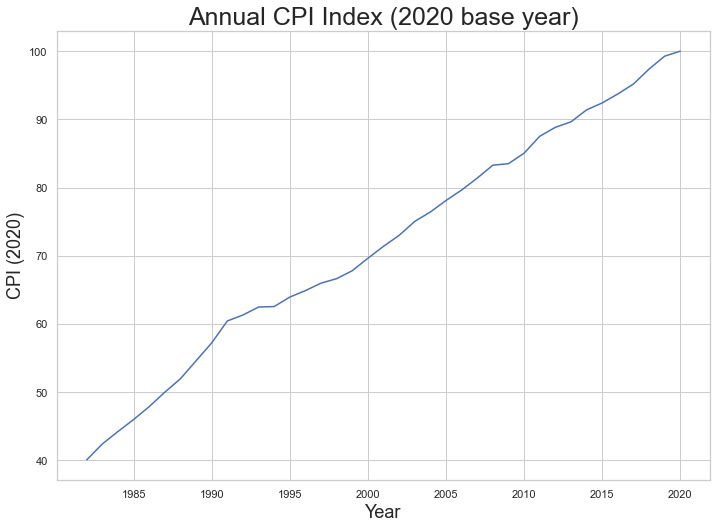

In [11]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_style("whitegrid")
ax = sns.lineplot(
    data=cpi_df,
    x="REF_DATE", y="VALUE_2020",
)
ax.set_xlabel("Year", fontsize=18)
ax.set_ylabel("CPI (2020)", fontsize=18)
ax.set_title("Annual CPI Index (2020 base year)", fontsize=25)
ax.figure.savefig("out/cpi_trend.png")

In [12]:
# Keep track of how many records we drop to get to the final sample size
mux = pd.MultiIndex.from_product([['SCF_1982','SCF_1991','CIS_2015', 'CIS_2017'], ['Dropped','Remaining']])
sample_df = pd.DataFrame(columns=mux)
# We will compute the 'Dropped' column at the end
sample_df.loc['Initial Sample'] = (0,len(scf_df_1982), 0,len(scf_df_1991), 0, len(cis_df_2015), 0, len(cis_df_2017))
sample_df                                                                              

SCF_1982           SCF_1991           CIS_2015            \
                Dropped Remaining  Dropped Remaining  Dropped Remaining   
Initial Sample        0     79517        0     89734        0     60028   

               CIS_2017            
                Dropped Remaining  
Initial Sample        0     92292

In [13]:
# filter out invalid values
cis_df_2017 = cis_df_2017[(cis_df_2017['WGSAL'] < 99999996) & (cis_df_2017['ALHRWK'] < 9996)]
cis_df_2015 = cis_df_2015[(cis_df_2015['WGSAL'] < 99999996) & (cis_df_2015['ALHRWK'] < 9996)]

# record dropped rows
sample_df.loc['Missing/miscoded info'] = (0,len(scf_df_1982), 0,len(scf_df_1991), 0, len(cis_df_2015), 0, len(cis_df_2017))

# filter out 0 hours
scf_df_1982 = scf_df_1982[(scf_df_1982['HRSWRK'] > 0) & (scf_df_1982['WKSWRK'] > 0)]
scf_df_1991 = scf_df_1991[(scf_df_1991['USHOURS'] > 0) & (scf_df_1991['WKSWRKYR'] > 0)]
cis_df_2017 = cis_df_2017[cis_df_2017['ALHRWK'] > 0]
cis_df_2015 = cis_df_2015[cis_df_2015['ALHRWK'] > 0]

# record dropped rows
sample_df.loc['Zero hours'] = (0,len(scf_df_1982), 0,len(scf_df_1991), 0, len(cis_df_2015), 0, len(cis_df_2017))

sample_df

SCF_1982           SCF_1991           CIS_2015  \
                       Dropped Remaining  Dropped Remaining  Dropped   
Initial Sample               0     79517        0     89734        0   
Missing/miscoded info        0     79517        0     89734        0   
Zero hours                   0     42570        0     48986        0   

                                CIS_2017            
                      Remaining  Dropped Remaining  
Initial Sample            60028        0     92292  
Missing/miscoded info     33011        0     50018  
Zero hours                33011        0     50018

In [14]:
# Compute the hourly wages for each individual (in 2020 dollars)

In [15]:
cis_df_2017['WGSAL']

0          9000
1          6500
3             0
6         55000
7         50000
          ...  
92275    185000
92277     80000
92278     31000
92290         0
92291     16000
Name: WGSAL, Length: 50018, dtype: int64

In [16]:
cis_df_2017['HOURLY_WAGE'] = cis_df_2017['WGSAL'] / cis_df_2017['ALHRWK']

In [17]:
cis_df_2017['HOURLY_WAGE'].describe()

count    50018.000000
mean        29.948586
std        145.268942
min          0.000000
25%         12.812500
50%         22.115385
75%         36.027406
max      28750.000000
Name: HOURLY_WAGE, dtype: float64

In [18]:
cis_df_2015['HOURLY_WAGE'] = cis_df_2015['WGSAL'] / cis_df_2015['ALHRWK']

In [19]:
# The scf dataset only includes hours worked per week (USHOURS) and number of hours worked per year (WKSWRKYR)
scf_df_1982['HOURLY_WAGE'] = scf_df_1982['WAGSAL'] / scf_df_1982['HRSWRK'] / scf_df_1982['WKSWRK'] 
scf_df_1991['HOURLY_WAGE'] = scf_df_1991['WAGSAL'] / scf_df_1991['USHOURS'] / scf_df_1991['WKSWRKYR']

/var/folders/vm/2f49ytdn1dbfj69vn12fkkzc0000gn/T/ipykernel_29509/3908106854.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scf_df_1982['HOURLY_WAGE'] = scf_df_1982['WAGSAL'] / scf_df_1982['HRSWRK'] / scf_df_1982['WKSWRK']


In [20]:
scf_df_1982['HOURLY_WAGE'].describe()

count    42570.000000
mean         8.487632
std         10.006034
min          0.000000
25%          3.903246
50%          7.311600
75%         11.184445
max        528.421053
Name: HOURLY_WAGE, dtype: float64

In [21]:
scf_df_1991['HOURLY_WAGE'].describe()

count    48986.000000
mean        13.549837
std         17.843814
min          0.000000
25%          6.063511
50%         11.523077
75%         17.671186
max       1392.134615
Name: HOURLY_WAGE, dtype: float64

In [22]:
# Normalize to 2020 dollars

In [23]:
scf_df_1982['HOURLY_WAGE_2020'] = scf_df_1982['HOURLY_WAGE'] / (cpi_df.loc[cpi_df['REF_DATE'] == 1982, 'VALUE_2020'].values[0] / 100)
scf_df_1991['HOURLY_WAGE_2020'] = scf_df_1991['HOURLY_WAGE'] / (cpi_df.loc[cpi_df['REF_DATE'] == 1991, 'VALUE_2020'].values[0] / 100)
cis_df_2015['HOURLY_WAGE_2020'] = cis_df_2015['HOURLY_WAGE'] / (cpi_df.loc[cpi_df['REF_DATE'] == 2015, 'VALUE_2020'].values[0] / 100)
cis_df_2017['HOURLY_WAGE_2020'] = cis_df_2017['HOURLY_WAGE'] / (cpi_df.loc[cpi_df['REF_DATE'] == 2017, 'VALUE_2020'].values[0] / 100)

/var/folders/vm/2f49ytdn1dbfj69vn12fkkzc0000gn/T/ipykernel_29509/371341005.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scf_df_1982['HOURLY_WAGE_2020'] = scf_df_1982['HOURLY_WAGE'] / (cpi_df.loc[cpi_df['REF_DATE'] == 1982, 'VALUE_2020'].values[0] / 100)


In [24]:
scf_df_1982['HOURLY_WAGE_2020'].describe()

count    42570.000000
mean        21.180430
std         24.969520
min          0.000000
25%          9.740341
50%         18.245704
75%         27.910183
max       1318.646343
Name: HOURLY_WAGE_2020, dtype: float64

In [25]:
cis_df_2017['HOURLY_WAGE_2020'].describe()

count    50018.000000
mean        31.464388
std        152.621512
min          0.000000
25%         13.460985
50%         23.234722
75%         37.850879
max      30205.138037
Name: HOURLY_WAGE_2020, dtype: float64

In [26]:
# Average minimum wages every year across all provinces
min_wage_df = pd.read_csv('minwage.csv')

In [27]:
min_wage_df.head(4)

,year,minwage
0,1965,0.9625
1,1966,1.0000
2,1967,1.1125
3,1968,1.1875


In [28]:
min_wage_df = min_wage_df[min_wage_df['year'] >= 1982] # remove rows not in cpi df
min_wage_df = min_wage_df[min_wage_df['year'] <= 2017]

In [29]:
# Must first convert nominal minwage to real minwage

def to_real_wage(r):
    year = r['year']
    return r['minwage'] / (cpi_df.loc[cpi_df['REF_DATE'] == year, 'VALUE_2020'].values[0] / 100)

min_wage_df['minwage_2020'] = min_wage_df.apply(lambda row : to_real_wage(row), axis=1)

In [30]:
# remove rows with wage below 50% of minimum wage
scf_df_1982 = scf_df_1982[scf_df_1982['HOURLY_WAGE_2020'] > 0.5 * min_wage_df.loc[min_wage_df['year'] == 1982, 'minwage_2020'].values[0] ]
scf_df_1991 = scf_df_1991[scf_df_1991['HOURLY_WAGE_2020'] > 0.5 * min_wage_df.loc[min_wage_df['year'] == 1991, 'minwage_2020'].values[0] ]
cis_df_2015 = cis_df_2015[cis_df_2015['HOURLY_WAGE_2020'] > 0.5 * min_wage_df.loc[min_wage_df['year'] == 2015, 'minwage_2020'].values[0] ]
cis_df_2017 = cis_df_2017[cis_df_2017['HOURLY_WAGE_2020'] > 0.5 * min_wage_df.loc[min_wage_df['year'] == 2017, 'minwage_2020'].values[0] ]

# record dropped rows
sample_df.loc['Wage < 0.5 x minimum wage'] = (0,len(scf_df_1982), 0,len(scf_df_1991), 0, len(cis_df_2015), 0, len(cis_df_2017))
sample_df

SCF_1982           SCF_1991           CIS_2015  \
                           Dropped Remaining  Dropped Remaining  Dropped   
Initial Sample                   0     79517        0     89734        0   
Missing/miscoded info            0     79517        0     89734        0   
Zero hours                       0     42570        0     48986        0   
Wage < 0.5 x minimum wage        0     35756        0     42006        0   

                                    CIS_2017            
                          Remaining  Dropped Remaining  
Initial Sample                60028        0     92292  
Missing/miscoded info         33011        0     50018  
Zero hours                    33011        0     50018  
Wage < 0.5 x minimum wage     28721        0     43266

In [31]:
cis_df_2017['HOURLY_WAGE_2020'].describe()

count    43266.000000
mean        36.226991
std        163.584815
min          6.285722
25%         17.319091
50%         26.378311
75%         40.408211
max      30205.138037
Name: HOURLY_WAGE_2020, dtype: float64

In [32]:
# Only keep individuals between the age of 25 - 60

In [33]:
scf_df_1982 = scf_df_1982[(scf_df_1982['AGE'] <= 60) & (scf_df_1982['AGE'] >= 25)]

In [34]:
scf_df_1991 = scf_df_1991[(scf_df_1991['AGE'] <= 60) & (scf_df_1991['AGE'] >= 25)]

In [35]:
cis_df_2017 = cis_df_2017[(cis_df_2017['AGEGP'] <= 13) & (cis_df_2017['AGEGP'] >= 7)]

In [36]:
cis_df_2015 = cis_df_2015[(cis_df_2015['AGEGP'] <= 13) & (cis_df_2015['AGEGP'] >= 7)]

In [37]:
# record dropped rows
sample_df.loc['Age 25-60'] = (0,len(scf_df_1982), 0,len(scf_df_1991), 0, len(cis_df_2015), 0, len(cis_df_2017))
sample_df

SCF_1982           SCF_1991           CIS_2015  \
                           Dropped Remaining  Dropped Remaining  Dropped   
Initial Sample                   0     79517        0     89734        0   
Missing/miscoded info            0     79517        0     89734        0   
Zero hours                       0     42570        0     48986        0   
Wage < 0.5 x minimum wage        0     35756        0     42006        0   
Age 25-60                        0     26563        0     34209        0   

                                    CIS_2017            
                          Remaining  Dropped Remaining  
Initial Sample                60028        0     92292  
Missing/miscoded info         33011        0     50018  
Zero hours                    33011        0     50018  
Wage < 0.5 x minimum wage     28721        0     43266  
Age 25-60                     21216        0     31991

In [38]:
# Remove those who work less than 260 hours

In [39]:
scf_df_1982['HOURS'] = scf_df_1982['HRSWRK'] * scf_df_1982['WKSWRK'] 
scf_df_1991['HOURS'] = scf_df_1991['USHOURS'] * scf_df_1991['WKSWRKYR']

In [40]:
scf_df_1982 = scf_df_1982[scf_df_1982['HOURS'] >= 260]
scf_df_1991 = scf_df_1991[scf_df_1991['HOURS'] >= 260]
cis_df_2015 = cis_df_2015[cis_df_2015['ALHRWK'] >= 260]
cis_df_2017 = cis_df_2017[cis_df_2017['ALHRWK'] >= 260]
# record dropped rows
sample_df.loc['Hours > 260'] = (0,len(scf_df_1982), 0,len(scf_df_1991), 0, len(cis_df_2015), 0, len(cis_df_2017))
sample_df

SCF_1982           SCF_1991           CIS_2015  \
                           Dropped Remaining  Dropped Remaining  Dropped   
Initial Sample                   0     79517        0     89734        0   
Missing/miscoded info            0     79517        0     89734        0   
Zero hours                       0     42570        0     48986        0   
Wage < 0.5 x minimum wage        0     35756        0     42006        0   
Age 25-60                        0     26563        0     34209        0   
Hours > 260                      0     25994        0     33449        0   

                                    CIS_2017            
                          Remaining  Dropped Remaining  
Initial Sample                60028        0     92292  
Missing/miscoded info         33011        0     50018  
Zero hours                    33011        0     50018  
Wage < 0.5 x minimum wage     28721        0     43266  
Age 25-60                     21216        0     31991  
Hours > 260                   20766        0     31352

In [41]:
diffs = sample_df.iloc[:, sample_df.columns.get_level_values(1)=='Remaining'].diff()

for c in diffs:
    d = (c[0], 'Dropped')
    sample_df[d] = np.absolute(diffs[c].values)

In [42]:
sample_df = sample_df.fillna(0)

In [43]:
sample_df.loc['Selected Sample'] = (0,len(scf_df_1982), 0,len(scf_df_1991), 0, len(cis_df_2015), 0, len(cis_df_2017))

In [44]:
sample_df # We will use 'Selected Sample' for the rest of the analysis

SCF_1982           SCF_1991           CIS_2015  \
                           Dropped Remaining  Dropped Remaining  Dropped   
Initial Sample                   0     79517        0     89734        0   
Missing/miscoded info            0     79517        0     89734    27017   
Zero hours                   36947     42570    40748     48986        0   
Wage < 0.5 x minimum wage     6814     35756     6980     42006     4290   
Age 25-60                     9193     26563     7797     34209     7505   
Hours > 260                    569     25994      760     33449      450   
Selected Sample                  0     25994        0     33449        0   

                                    CIS_2017            
                          Remaining  Dropped Remaining  
Initial Sample                60028        0     92292  
Missing/miscoded info         33011    42274     50018  
Zero hours                    33011        0     50018  
Wage < 0.5 x minimum wage     28721     6752     43266  
Age 25-60                     21216    11275     31991  
Hours > 260                   20766      639     31352  
Selected Sample               20766        0     31352

In [45]:
# Plot time series of the log variance of total income, after-tax income, and wages + salary

In [46]:
scf_df_1982['TOTINC'].describe()

count     25994.000000
mean      20771.502693
std       11756.421191
min      -23216.000000
25%       12638.500000
50%       19244.000000
75%       26700.000000
max      156401.000000
Name: TOTINC, dtype: float64

In [47]:
# We have some negative values so we must add the min to make them all positive
scf_df_1982['LOG_TTINC'] = scf_df_1982['TOTINC'].apply(lambda x : math.log(x + 23217))

In [48]:
scf_df_1982['LOG_TTINC'].describe()

count    25994.000000
mean        10.659817
std          0.255173
min          0.000000
25%         10.487252
50%         10.656341
75%         10.818117
max         12.098588
Name: LOG_TTINC, dtype: float64

In [49]:
scf_df_1991['TOTINC'].min()

-53224

In [50]:
scf_df_1991['LOG_TTINC'] = scf_df_1991['TOTINC'].apply(lambda x : math.log(x + 53225))

In [51]:
min15 = abs(cis_df_2015['TTINC'].min())
min17 = abs(cis_df_2017['TTINC'].min())

cis_df_2015['LOG_TTINC'] = cis_df_2015['TTINC'].apply(lambda x : math.log(x + min15 + 1))
cis_df_2017['LOG_TTINC'] = cis_df_2017['TTINC'].apply(lambda x : math.log(x + min17 + 1))

In [52]:
# We must use the survey weights
w_ttinc_1982 = DescrStatsW(scf_df_1982['LOG_TTINC'], weights=scf_df_1982['REVWEIG'])
w_ttinc_1991 = DescrStatsW(scf_df_1991['LOG_TTINC'], weights=scf_df_1991['WEIGHT'])
w_ttinc_2015 = DescrStatsW(cis_df_2015['LOG_TTINC'], weights=cis_df_2015['FWEIGHT'])
w_ttinc_2017 = DescrStatsW(cis_df_2017['LOG_TTINC'], weights=cis_df_2017['FWEIGHT'])

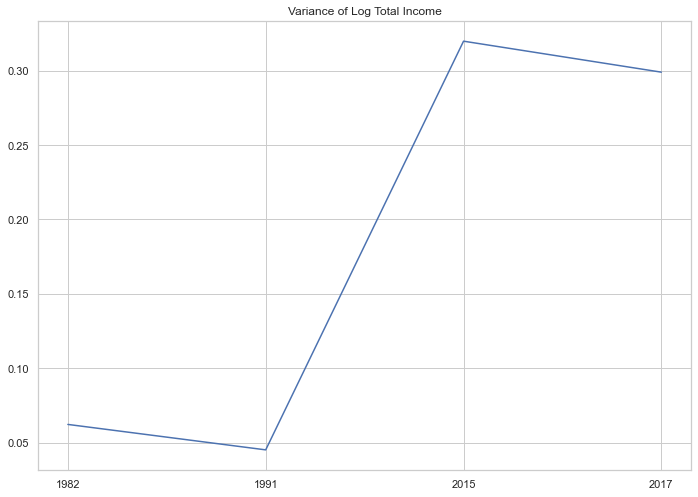

In [53]:
# Plot the log total income variance
years = ['1982', '1991', '2015', '2017']
ax = sns.lineplot(x=years, y=[w_ttinc_1982.var, w_ttinc_1991.var, w_ttinc_2015.var, w_ttinc_2017.var])
ax.set_title('Variance of Log Total Income')
ax.figure.savefig("out/variance_log_total_income.png")

In [54]:
# Now the same for after-tax income

In [55]:
min82 = abs(scf_df_1982['INCAFTTX'].min())
min91 = abs(scf_df_1991['INCFTX'].min())
min15 = abs(cis_df_2015['ATINC'].min())
min17 = abs(cis_df_2017['ATINC'].min())

scf_df_1982['LOG_ATINC'] = scf_df_1982['INCAFTTX'].apply(lambda x : math.log(x + min82 + 1))
scf_df_1991['LOG_ATINC'] = scf_df_1991['INCFTX'].apply(lambda x : math.log(x + min91 + 1))
cis_df_2015['LOG_ATINC'] = cis_df_2015['ATINC'].apply(lambda x : math.log(x + min15 + 1))
cis_df_2017['LOG_ATINC'] = cis_df_2017['ATINC'].apply(lambda x : math.log(x + min17 + 1))

In [56]:
w_atinc_1982 = DescrStatsW(scf_df_1982['LOG_ATINC'], weights=scf_df_1982['REVWEIG'])
w_atinc_1991 = DescrStatsW(scf_df_1991['LOG_ATINC'], weights=scf_df_1991['WEIGHT'])
w_atinc_2015 = DescrStatsW(cis_df_2015['LOG_ATINC'], weights=cis_df_2015['FWEIGHT'])
w_atinc_2017 = DescrStatsW(cis_df_2017['LOG_ATINC'], weights=cis_df_2017['FWEIGHT'])

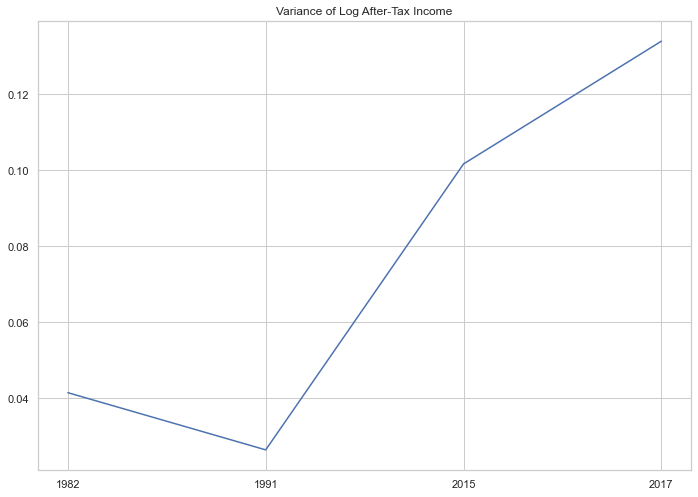

In [57]:
ax = sns.lineplot(x=years, y=[w_atinc_1982.var, w_atinc_1991.var, w_atinc_2015.var, w_atinc_2017.var])
ax.set_title('Variance of Log After-Tax Income')
ax.figure.savefig("out/variance_log_after_tax_income.png")

In [58]:
# Do the same for wages and salaries

In [59]:
min82 = abs(scf_df_1982['WAGSAL'].min())
min91 = abs(scf_df_1991['WAGSAL'].min())
min15 = abs(cis_df_2015['WGSAL'].min())
min17 = abs(cis_df_2017['WGSAL'].min())

scf_df_1982['LOG_WGSAL'] = scf_df_1982['WAGSAL'].apply(lambda x : math.log(x + min82 + 1))
scf_df_1991['LOG_WGSAL'] = scf_df_1991['WAGSAL'].apply(lambda x : math.log(x + min91 + 1))
cis_df_2015['LOG_WGSAL'] = cis_df_2015['WGSAL'].apply(lambda x : math.log(x + min15 + 1))
cis_df_2017['LOG_WGSAL'] = cis_df_2017['WGSAL'].apply(lambda x : math.log(x + min17 + 1))

In [60]:
w_wgsal_1982 = DescrStatsW(scf_df_1982['LOG_WGSAL'], weights=scf_df_1982['REVWEIG'])
w_wgsal_1991 = DescrStatsW(scf_df_1991['LOG_WGSAL'], weights=scf_df_1991['WEIGHT'])
w_wgsal_2015 = DescrStatsW(cis_df_2015['LOG_WGSAL'], weights=cis_df_2015['FWEIGHT'])
w_wgsal_2017 = DescrStatsW(cis_df_2017['LOG_WGSAL'], weights=cis_df_2017['FWEIGHT'])

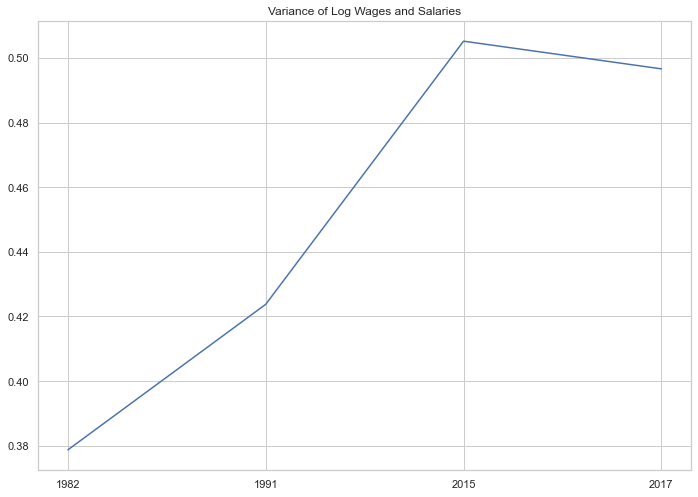

In [61]:
ax = sns.lineplot(x=years, y=[w_wgsal_1982.var, w_wgsal_1991.var, w_wgsal_2015.var, w_wgsal_2017.var])
ax.set_title('Variance of Log Wages and Salaries')
ax.figure.savefig("out/variance_log_wages_salaries.png")

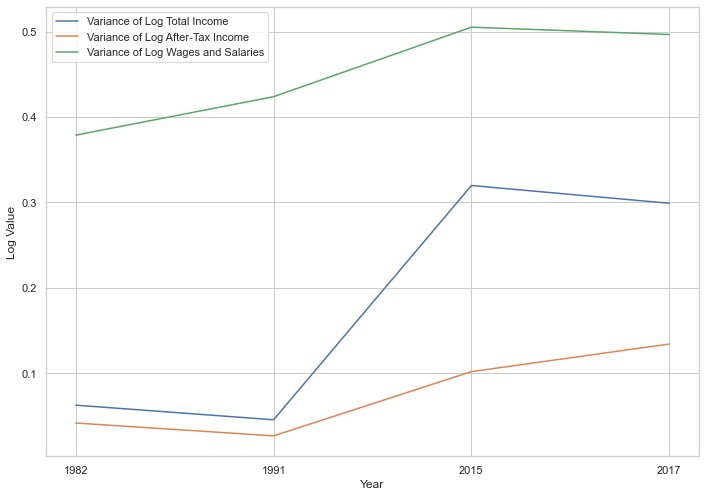

In [62]:
# Plot them all together
data_preproc = pd.DataFrame({
    'Year': years, 
    'Variance of Log Total Income': [w_ttinc_1982.var, w_ttinc_1991.var, w_ttinc_2015.var, w_ttinc_2017.var],
    'Variance of Log After-Tax Income': [w_atinc_1982.var, w_atinc_1991.var, w_atinc_2015.var, w_atinc_2017.var],
    'Variance of Log Wages and Salaries': [w_wgsal_1982.var, w_wgsal_1991.var, w_wgsal_2015.var, w_wgsal_2017.var],
    })
ax = sns.lineplot(x='Year', y='value', hue='variable', data=pd.melt(data_preproc, ['Year']))
# hide legend title
ax.get_legend().set_title(None)
ax.set_ylabel('Log Value')
ax.figure.savefig("out/variance_log_all.png")

In [63]:
# calculate the Gini

In [64]:
def gini(x, w):
    x = np.asarray(x)
    w = np.asarray(w)
    sorted_indices = np.argsort(x)
    sorted_x = x[sorted_indices]
    sorted_w = w[sorted_indices]
    # Force float dtype to avoid overflows
    cumw = np.cumsum(sorted_w, dtype=float)
    cumxw = np.cumsum(sorted_x * sorted_w, dtype=float)
    return (np.sum(cumxw[1:] * cumw[:-1] - cumxw[:-1] * cumw[1:]) / (cumxw[-1] * cumw[-1]))

In [65]:
# For practical reasons, we can rename the columns to be identical across surveys
scf_df_1982 = scf_df_1982.rename(columns={'REVWEIG': 'FWEIGHT', 'WAGSAL': 'WGSAL', 'TOTINC': 'TTINC','INCAFTTX': 'ATINC' })
scf_df_1991 = scf_df_1991.rename(columns={'WEIGHT': 'FWEIGHT', 'WAGSAL': 'WGSAL', 'TOTINC': 'TTINC','INCFTX': 'ATINC' })

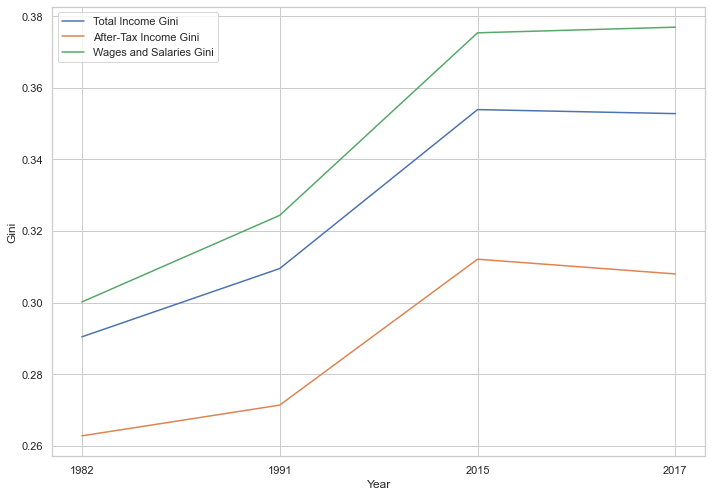

In [66]:
ttinc_gini = []
atinc_gini = []
wgsal_gini = []

surveys = [scf_df_1982, scf_df_1991, cis_df_2015, cis_df_2017]

for df in surveys:
    w = df['FWEIGHT']
    ttinc_gini.append(gini(df['TTINC'], w))
    atinc_gini.append(gini(df['ATINC'], w))
    wgsal_gini.append(gini(df['WGSAL'], w))
    
    
# Plot all gini together
data_preproc_gini = pd.DataFrame({
    'Year': years, 
    'Total Income Gini': ttinc_gini ,
    'After-Tax Income Gini': atinc_gini,
    'Wages and Salaries Gini': wgsal_gini,
    })
ax = sns.lineplot(x='Year', y='value', hue='variable', data=pd.melt(data_preproc_gini, ['Year']))
# hide legend title
ax.get_legend().set_title(None)
ax.set_ylabel('Gini')
ax.figure.savefig("out/wage_gini_all.png")

In [67]:
# Plot the time series of log variances for annual wages, hourly wages, and annual hours

In [68]:
# Again, let's keep the variabels consistent
cis_df_2015 = cis_df_2015.rename(columns={'ALHRWK': 'HOURS'})
cis_df_2017 = cis_df_2017.rename(columns={'ALHRWK': 'HOURS'})
surveys = [scf_df_1982, scf_df_1991, cis_df_2015, cis_df_2017]

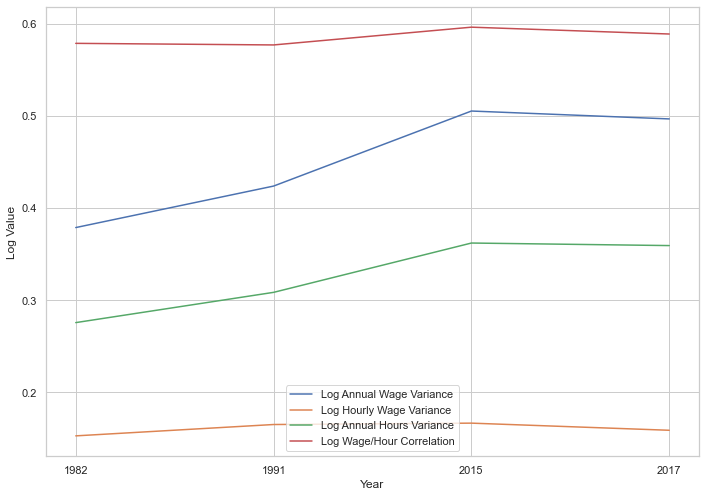

In [69]:
wgsal_vars = [w_wgsal_1982.var, w_wgsal_1991.var, w_wgsal_2015.var, w_wgsal_2017.var]
hour_vars = []
hourly_wage_vars = []
corr = []

for df in surveys:
    df['LOG_HOURS'] = df['HOURS'].apply(lambda x : math.log(x))
    df['LOG_WAGES'] = df['HOURLY_WAGE_2020'].apply(lambda x : math.log(x))
    
    w_hour = DescrStatsW(df['LOG_HOURS'], weights=df['FWEIGHT'])
    w_hourly_wage = DescrStatsW(df['LOG_WAGES'], weights=df['FWEIGHT'])

    
    hour_vars.append(w_hour.var)
    hourly_wage_vars.append(w_hourly_wage.var)
    
    # Let's also compute correlation of log hours and log wages
    
    corr_df = pd.DataFrame({
        'log_hours': df['LOG_HOURS'],
        'log_wages': df['LOG_WGSAL']
    })
    
    w_corr = DescrStatsW(corr_df, weights=df['FWEIGHT'])
    
    corr.append(w_corr.corrcoef[0][1])

data_preproc_logs = pd.DataFrame({
    'Year': years, 
    'Log Annual Wage Variance': wgsal_vars ,
    'Log Hourly Wage Variance': hour_vars,
    'Log Annual Hours Variance': hourly_wage_vars,
    'Log Wage/Hour Correlation': corr,

    })
ax = sns.lineplot(x='Year', y='value', hue='variable', data=pd.melt(data_preproc_logs, ['Year']))
# hide legend title
ax.get_legend().set_title(None)
ax.set_ylabel('Log Value')
ax.figure.savefig("out/log_wage_hours_all.png")

In [70]:
# Let's repeat this for men (1) and for women (2)

In [71]:
cis_df_2017[cis_df_2017['SEX'] == 1]

,YEAR,PUMFID,PERSONID,FWEIGHT,PROV,USZGAP,MBMREGP,AGEGP,SEX,MARST,...,RENTM,CHNEED,VERDATE,HOURLY_WAGE,HOURLY_WAGE_2020,LOG_TTINC,LOG_ATINC,LOG_WGSAL,LOG_HOURS,LOG_WAGES
8,2017,2132,213202,290.6734,35,4,22,10,1,1,...,99999996,2,02JUL2019,21.416084,22.500027,10.968216,11.111716,10.835671,7.735433,3.113517
14,2017,2134,213402,99.4647,47,1,30,13,1,1,...,99999996,6,02JUL2019,28.846154,30.306159,11.340665,11.385955,11.248973,7.863267,3.411351
22,2017,2138,213803,756.3312,35,8,25,7,1,6,...,1000,2,02JUL2019,12.019231,12.627566,10.140573,10.641393,9.729194,7.129298,2.535882
24,2017,2139,213902,549.2181,35,6,23,10,1,1,...,99999996,2,02JUL2019,18.078512,18.993529,9.784197,10.440887,9.263976,6.182085,2.944098
29,2017,2142,214201,1961.9147,24,8,19,11,1,6,...,1400,2,02JUL2019,13.970588,14.677689,10.623788,10.917649,9.942756,7.215240,2.686329
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92251,2017,41881,4188102,1695.1845,24,8,19,12,1,6,...,99999996,2,02JUL2019,29.687500,31.190088,11.060384,11.165224,9.942756,6.461468,3.440100
92255,2017,41883,4188302,88.4524,24,1,14,11,1,2,...,99999996,6,02JUL2019,16.581633,17.420887,11.211834,11.364669,11.109473,8.273847,2.857670
92273,2017,41891,4189103,136.5054,48,1,34,9,1,6,...,1100,6,02JUL2019,72.115385,75.765396,11.976666,11.807466,11.930326,7.640123,4.327642
92275,2017,41892,4189202,172.7108,48,8,38,8,1,1,...,99999996,2,02JUL2019,79.059829,83.061323,12.175619,12.015463,12.137799,7.757906,4.419579


In [72]:
surveys = [scf_df_1982, scf_df_1991, cis_df_2015, cis_df_2017]


def graph_wages_for_sex(sex, code):
    
    wgsal_vars = []
    hour_vars = []
    hourly_wage_vars = []
    corr = []

    for df in surveys:
        df_sex = df[df['SEX'] == code]

        w_hour = DescrStatsW(df_sex['LOG_HOURS'], weights=df_sex['FWEIGHT'])
        w_hourly_wage = DescrStatsW(df_sex['LOG_WAGES'], weights=df_sex['FWEIGHT'])
        w_wgsal = DescrStatsW(df_sex['LOG_WGSAL'], weights=df_sex['FWEIGHT'])


        wgsal_vars.append(w_wgsal.var)
        hour_vars.append(w_hour.var)
        hourly_wage_vars.append(w_hourly_wage.var)

        corr_df = pd.DataFrame({
            'log_hours': df_sex['LOG_HOURS'],
            'log_wages': df_sex['LOG_WGSAL']
        })

        w_corr = DescrStatsW(corr_df, weights=df_sex['FWEIGHT'])

        corr.append(w_corr.corrcoef[0][1])

    data_preproc_logs = pd.DataFrame({
        'Year': years, 
        'Log Annual Wage Variance': wgsal_vars ,
        'Log Hourly Wage Variance': hour_vars,
        'Log Annual Hours Variance': hourly_wage_vars,
        'Log Wage/Hour Correlation': corr,

        })
    ax = sns.lineplot(x='Year', y='value', hue='variable', data=pd.melt(data_preproc_logs, ['Year']))
    # hide legend title
    ax.get_legend().set_title(None)
    ax.set_ylabel('Log Value')
    ax.set_title(sex)
    ax.figure.savefig("out/log_wage_hours_{}.png".format(sex.lower()))

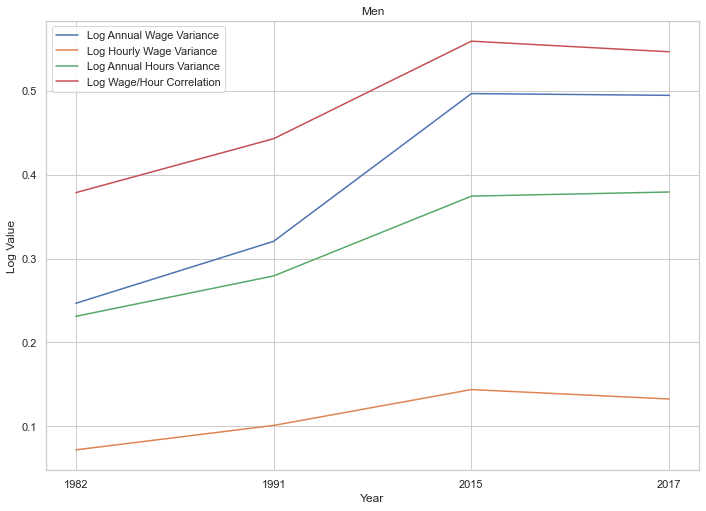

In [73]:
graph_wages_for_sex('Men', 1)

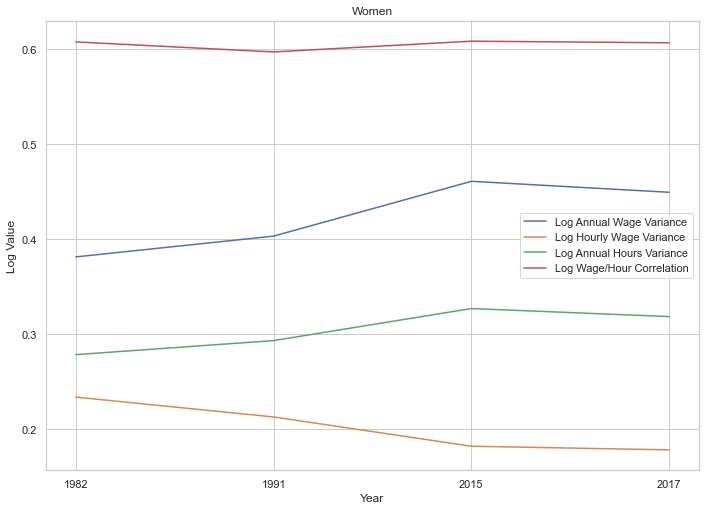

In [74]:
graph_wages_for_sex('Women', 2)

In [75]:
# Plot the percentiles of hourly wages

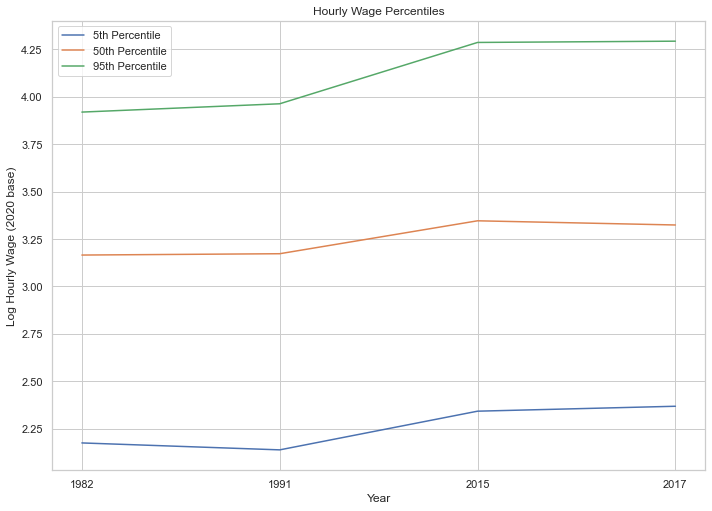

In [76]:
p5 = []
p50 = []
p95 = []

for df in surveys:
    
    w_hourly_wage = DescrStatsW(df['LOG_WAGES'], weights=df['FWEIGHT'])

    percentiles = w_hourly_wage.quantile([.05, .5, .95]).values
    
    p5.append(percentiles[0])
    p50.append(percentiles[1])
    p95.append(percentiles[2])


data_preproc_perc = pd.DataFrame({
    'Year': years, 
    '5th Percentile': p5 ,
    '50th Percentile': p50,
    '95th Percentile': p95,
    })
ax = sns.lineplot(x='Year', y='value', hue='variable', data=pd.melt(data_preproc_perc, ['Year']))
# hide legend title
ax.get_legend().set_title(None)
ax.set_ylabel('Log Hourly Wage (2020 base)')
ax.set_title('Hourly Wage Percentiles')
ax.yaxis.set_major_locator(ticker.MultipleLocator(0.25))
ax.yaxis.set_major_formatter(ticker.ScalarFormatter())
ax.figure.savefig("out/hourly_wage_percentiles.png")

In [77]:
# Create an estimation for potential experience

In [78]:
# First we will need to map the education groups to years
cis_df_2015['HLEV2G'].unique()

array([1, 3, 2, 4, 9])

In [79]:
university = 4
college = 2
high_school = 4
middle_school = 3
elementary = 5

def cis_schooling_estimate(row):
    group = row['HLEV2G']
    if (group == 1):
        # less than highschool, assume no years of highschool 
        return elementary + middle_school
    elif (group == 2):
        # highschool grad
        return elementary + middle_school + high_school
    elif (group == 3):
        # non-university postsecondary certificate
        return elementary + middle_school + high_school + college
    elif (group == 4):
        # uni grad
        return elementary + middle_school + high_school + university
    else:
        # invalid
        return 999

In [80]:
# Our estimate will be slightly inaccurate to keep identical grouping with CIS
def scf_1991_schooling_estimate(row):
    group = row['EDUCREC']
    if (group == 1):
        # no schooling or grade 8 or lower
        return elementary + middle_school
    elif (group == 2):
        # grade 9-10
        return elementary + middle_school
    elif (group == 3):
        # grade 11 - 13, no graduate
        return elementary + middle_school
    elif (group == 4):
        # highschool grad
        return elementary + middle_school + high_school
    elif (group == 5):
        # some post-secondary
        return elementary + middle_school + high_school
    elif (group == 6):
        # post-secondary certificate
        return elementary + middle_school + high_school + college
    elif (group == 7):
        # university degree
        return elementary + middle_school + high_school + university

In [81]:
def scf_1982_schooling_estimate(row):
    group = row['EDUC']
    if (group == 1):
        # no schooling or elementary
        return elementary + middle_school
    elif (group == 2):
        # grade 9-10
        return elementary + middle_school
    elif (group == 3):
        # grade 11
        return elementary + middle_school
    elif (group == 4):
        # grade 12
        return elementary + middle_school + high_school
    elif (group == 5):
        # grade 13
        return elementary + middle_school + high_school
    elif (group == 6):
        # some post-secondary 
        return elementary + middle_school + high_school
    elif (group == 7):
        # post-secondary certificatae
        return elementary + middle_school + high_school + college
    elif (group == 8):
        # university degree
        return elementary + middle_school + high_school + university

In [82]:
scf_df_1982['YEARS_SCHOOLING'] = scf_df_1982.apply(scf_1982_schooling_estimate, axis=1)
scf_df_1991['YEARS_SCHOOLING'] = scf_df_1991.apply(scf_1991_schooling_estimate, axis=1)
cis_df_2015['YEARS_SCHOOLING'] = cis_df_2015.apply(cis_schooling_estimate, axis=1)
cis_df_2017['YEARS_SCHOOLING'] = cis_df_2017.apply(cis_schooling_estimate, axis=1)

In [83]:
# Create an estimation for 'potential experience' as age - YEARS_SCHOOLING - 6

# Unfortunately we first have to map the age groups in CIS to a number

def cis_age(row):
    group = int(row['AGEGP'])
    if (group == 1):
        return 3
    elif (group == 2):
        return 8
    elif (group == 3):
        return 13
    elif (group == 4):
        return 17
    elif (group == 5):
        return 19
    elif (group == 6):
        return 22
    elif (group == 7):
        return 27
    elif (group == 8):
        return 32
    elif (group == 9):
        return 37
    elif (group == 10):
        return 42
    elif (group == 11):
        return 47
    elif (group == 12):
        return 52
    elif (group == 13):
        return 57
    elif (group == 14):
        return 62
    elif (group == 15):
        return 67
    elif (group == 16):
        return 72

In [84]:
# Let's do the same for scf so the number of groups is consistent
def scf_age(row):
    age = int(row['AGE'])
    if (age < 25): # We can be smart and skip ages outside of 20-65 because we already dropped them
        return 22
    elif (age < 30):
        return 27
    elif (age < 35):
        return 32
    elif (age < 40):
        return 37
    elif (age < 45):
        return 42
    elif (age < 50):
        return 47
    elif (age < 55):
        return 52
    else:
        return 57

In [85]:
for df in [cis_df_2015, cis_df_2017]:
    df['AGE'] = df.apply(cis_age, axis=1)
    
for df in [scf_df_1982, scf_df_1991]:
    df['AGE'] = df.apply(scf_age, axis=1)

In [86]:
# divide the potential expierence into 4 bins
def pot_exp_category(row):
    exp = row['POTENTIAL_EXP']
    
    if (exp <= 9):
        return 1
    elif (exp <= 19):
        return 2
    elif (exp <=29):
        return 3
    else:
        return 4
    

for df in [scf_df_1982, scf_df_1991, cis_df_2015, cis_df_2017]:
    df['POTENTIAL_EXP'] = df['AGE'] - df['YEARS_SCHOOLING'] - 6
    df['POTENTIAL_EXP_CAT'] = df.apply(pot_exp_category, axis=1)

In [87]:
cis_df_2015['POTENTIAL_EXP'].describe()

count    20766.000000
mean        14.859193
std         89.637351
min       -978.000000
25%         14.000000
50%         22.000000
75%         32.000000
max         43.000000
Name: POTENTIAL_EXP, dtype: float64

In [ ]:
cis_df_2015['POTENTIAL_EXP'] = cis_df_2015['POTENTIAL_EXP'].apply(lambda x : 0 if (x < 0) else x)
cis_df_2017['POTENTIAL_EXP'] = cis_df_2017['POTENTIAL_EXP'].apply(lambda x : 0 if (x < 0) else x)

In [88]:
cis_df_2015['POTENTIAL_EXP_CAT'].describe()

count    20766.000000
mean         2.798517
std          1.027833
min          1.000000
25%          2.000000
50%          3.000000
75%          4.000000
max          4.000000
Name: POTENTIAL_EXP_CAT, dtype: float64

In [89]:
# examine gender x education x potential experience

In [90]:
# We first have to standardize education. Create 4 groups: 
# 1: highschool dropouts
# 2: highschool grad
# 3: some college
# 4: university degree

In [91]:
def years_schooling_to_education(row):
    years = row['YEARS_SCHOOLING']
    if (years < 12):
        return 1
    elif (years == 12):
        return 2
    elif (years < 16):
        return 3
    else:
        return 4

In [92]:
for df in [scf_df_1982, scf_df_1991, cis_df_2015, cis_df_2017]:
    df['EDUCATION'] = df.apply(years_schooling_to_education, axis=1)

In [102]:
np.sort(scf_df_1991['POTENTIAL_EXP_CAT'].unique())


array([1, 2, 3, 4])

In [99]:
np.sort(cis_df_2015['POTENTIAL_EXP_CAT'].unique())

array([1, 2, 3, 4])

In [100]:
# Let's see how many groups this creates
groups = []
for df in [scf_df_1982, scf_df_1991, cis_df_2015, cis_df_2017]:
    size = df.groupby(['SEX', 'EDUCATION', 'POTENTIAL_EXP_CAT']).size()
    groups.append(len(size))
print(groups)
print(sum(groups))

[30, 30, 30, 30]
120


In [103]:
# Weighted percentage of the total sample for each group
for df in [scf_df_1982, scf_df_1991, cis_df_2015, cis_df_2017]:
    total_weight = df['FWEIGHT'].sum()

    group_weights = df.groupby(['SEX', 'EDUCATION', 'POTENTIAL_EXP_CAT'])['FWEIGHT'].sum()
    
    group_percentages = group_weights / total_weight
    
    print(group_percentages)


SEX  EDUCATION  POTENTIAL_EXP_CAT
1    1          2                    0.065799
                3                    0.071719
                4                    0.109296
     2          1                    0.051060
                2                    0.069395
                3                    0.034822
                4                    0.028930
     3          1                    0.019191
                2                    0.034280
                3                    0.014498
                4                    0.011178
     4          1                    0.022521
                2                    0.042225
                3                    0.023970
                4                    0.013526
2    1          2                    0.034268
                3                    0.042325
                4                    0.054534
     2          1                    0.038168
                2                    0.048745
                3                    0.029021


In [104]:
# Compute the mean wage in each group and year

In [106]:
def compute_average_wage(group):
    total_weight = group['FWEIGHT'].sum()

    return group['W_HOURLY_WAGE_2020'].sum() / total_weight

for df in [scf_df_1982, scf_df_1991, cis_df_2015, cis_df_2017]:

    # create a column for the weighted wage first
    df['W_HOURLY_WAGE_2020'] = df['HOURLY_WAGE_2020'] * df['FWEIGHT']

    average_wages = df.groupby(['SEX', 'EDUCATION', 'POTENTIAL_EXP_CAT'])['W_HOURLY_WAGE_2020', 'FWEIGHT'].apply(compute_average_wage)

    print(average_wages)


SEX  EDUCATION  POTENTIAL_EXP_CAT
1    1          2                    23.622005
                3                    25.328860
                4                    26.339751
     2          1                    25.129429
                2                    28.185191
                3                    31.422611
                4                    30.683552
     3          1                    26.077915
                2                    30.498673
                3                    31.488819
                4                    32.931552
     4          1                    27.626980
                2                    37.212742
                3                    41.617849
                4                    42.926115
2    1          2                    16.474832
                3                    17.604483
                4                    17.756644
     2          1                    19.902138
                2                    21.119367
                3         

/var/folders/vm/2f49ytdn1dbfj69vn12fkkzc0000gn/T/ipykernel_29509/951989864.py:11: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  average_wages = df.groupby(['SEX', 'EDUCATION', 'POTENTIAL_EXP_CAT'])['W_HOURLY_WAGE_2020', 'FWEIGHT'].apply(compute_average_wage)


In [107]:
# We are interested in the mean wage for the following groups:
# a) population
# b) women
# c) men
# d) university graduates
# e) high-school graduates

In [108]:
# Let's start by computing this value the "naive" way

naive_df = pd.DataFrame(columns=['Population', 'Women', 'Men', 'University Graduates', 'High-School Graduates'])

for survey in [('1982', scf_df_1982), ('1991', scf_df_1991), ('2015', cis_df_2015), ('2017', cis_df_2017)]:
    year, dataFrame = survey
    
    # restric the sample to uni and highschool since we are not looking at anything else atm
    df = dataFrame[(dataFrame['EDUCATION'] == 2) | (dataFrame['EDUCATION'] == 4)]
    
    w_all = DescrStatsW(df['HOURLY_WAGE_2020'], weights=df['FWEIGHT'])
    
    women_df = df[df['SEX'] == 2]
    w_women = DescrStatsW(women_df['HOURLY_WAGE_2020'], weights=women_df['FWEIGHT'])
    
    men_df = df[df['SEX'] == 1]
    w_men = DescrStatsW(men_df['HOURLY_WAGE_2020'], weights=men_df['FWEIGHT'])
    
    uni_df = df[df['EDUCATION'] == 4]
    w_uni = DescrStatsW(uni_df['HOURLY_WAGE_2020'], weights=uni_df['FWEIGHT'])
    
    hs_df = df[df['EDUCATION'] == 2]
    w_hs = DescrStatsW(hs_df['HOURLY_WAGE_2020'], weights=hs_df['FWEIGHT'])

    
    naive_df.loc[year] = [w_all.mean, w_women.mean, w_men.mean, w_uni.mean, w_hs.mean]
    
naive_df

,Population,Women,Men,University Graduates,High-School Graduates
1982,28.218278,23.391279,31.393337,34.645493,25.132874
1991,28.639203,24.314171,32.277223,34.805133,25.269493
2015,36.016048,32.184937,39.784806,40.427806,27.977339
2017,36.134604,32.005566,40.190923,40.811470,27.349674


In [109]:
# Now let's report on compositional-corrected wages. 
# This means that we find the group composition in 1982 for each group, and then keep that 
# proportion constant for all four years. This helps us see the 'true' evolution in the 
# wages for each group without just observing changes in the proportion of the population that each inhabits

In [110]:
sample_df = scf_df_1982[(scf_df_1982['EDUCATION'] == 2) | (scf_df_1982['EDUCATION'] == 4)]

women_df_1982 = sample_df[sample_df['SEX'] == 2]
women_uni_df_1982 = women_df_1982[women_df_1982['EDUCATION'] == 4]

p_women_uni = women_uni_df_1982['FWEIGHT'].sum() / women_df_1982['FWEIGHT'].sum()

p_women_hs = 1 - p_women_uni

men_df_1982 = sample_df[sample_df['SEX'] == 1]
men_uni_df_1982 = men_df_1982[men_df_1982['EDUCATION'] == 4]

p_men_uni = men_uni_df_1982['FWEIGHT'].sum() / men_df_1982['FWEIGHT'].sum()

p_men_hs = 1 - p_men_uni

hs_df_1982 = sample_df[sample_df['EDUCATION'] == 2]
hs_men_df_1982 = hs_df_1982[hs_df_1982['SEX'] == 1]

p_hs_men = hs_men_df_1982['FWEIGHT'].sum() / hs_df_1982['FWEIGHT'].sum()

p_hs_women = 1 - p_hs_men

uni_df_1982 = sample_df[sample_df['EDUCATION'] == 2]
uni_men_df_1982 = uni_df_1982[uni_df_1982['SEX'] == 1]

p_uni_men = uni_men_df_1982['FWEIGHT'].sum() / uni_df_1982['FWEIGHT'].sum()

p_uni_women = 1 - p_uni_men

# Calc the composition for the population
total_w_1982 = sample_df['FWEIGHT'].sum()

p_women = women_df_1982['FWEIGHT'].sum() / total_w_1982
p_men = 1 - p_women

p_uni = uni_df_1982['FWEIGHT'].sum() / total_w_1982
p_hs = 1 - p_uni


In [111]:
p_women_uni

0.2748162964943088

In [112]:
p_hs_men

0.5741315728337533

In [113]:
# Now compute the compositionally corrected way

corrected_df = pd.DataFrame(columns=['Population', 'Women', 'Men', 'University Graduates', 'High-School Graduates'])

for survey in [('1982', scf_df_1982), ('1991', scf_df_1991), ('2015', cis_df_2015), ('2017', cis_df_2017)]:
    year, dataFrame = survey
    
    # restrict the sample to uni and highschool since we are not looking at anything else atm
    df = dataFrame[(dataFrame['EDUCATION'] == 2) | (dataFrame['EDUCATION'] == 4)]
    
    w_all = DescrStatsW(df['HOURLY_WAGE_2020'], weights=df['FWEIGHT'])
    
    women_df = df[df['SEX'] == 2]
    women_uni_df = women_df[women_df['EDUCATION'] == 4]
    women_hs_df = women_df[women_df['EDUCATION'] == 2]

    w_women_uni = DescrStatsW(women_uni_df['HOURLY_WAGE_2020'], weights=women_uni_df['FWEIGHT'])
    w_women_hs = DescrStatsW(women_hs_df['HOURLY_WAGE_2020'], weights=women_hs_df['FWEIGHT'])
    
    women_mean = (p_women_uni * w_women_uni.mean) + (p_women_hs * w_women_hs.mean)

    
    men_df = df[df['SEX'] == 1]
    men_uni_df = men_df[men_df['EDUCATION'] == 4]
    men_hs_df = men_df[men_df['EDUCATION'] == 2]

    w_men_uni = DescrStatsW(men_uni_df['HOURLY_WAGE_2020'], weights=men_uni_df['FWEIGHT'])
    w_men_hs = DescrStatsW(men_hs_df['HOURLY_WAGE_2020'], weights=men_hs_df['FWEIGHT'])
    
    men_mean = (p_men_uni * w_men_uni.mean) + (p_men_hs * w_men_hs.mean)
    
    
    uni_df = df[df['EDUCATION'] == 4]
    uni_women_df = uni_df[uni_df['SEX'] == 2]
    uni_men_df = uni_df[uni_df['SEX'] == 1]
    
    w_uni_women = DescrStatsW(uni_women_df['HOURLY_WAGE_2020'], weights=uni_women_df['FWEIGHT'])
    w_uni_men = DescrStatsW(uni_men_df['HOURLY_WAGE_2020'], weights=uni_men_df['FWEIGHT'])
    
    uni_mean = (p_uni_women * w_uni_women.mean) + (p_uni_men * w_uni_men.mean)


    hs_df = df[df['EDUCATION'] == 2]
    hs_women_df = hs_df[hs_df['SEX'] == 2]
    hs_men_df = hs_df[hs_df['SEX'] == 1]
    
    w_hs_women = DescrStatsW(hs_women_df['HOURLY_WAGE_2020'], weights=hs_women_df['FWEIGHT'])
    w_hs_men = DescrStatsW(hs_men_df['HOURLY_WAGE_2020'], weights=hs_men_df['FWEIGHT'])
    
    hs_mean = (p_hs_women * w_hs_women.mean) + (p_hs_men * w_hs_men.mean)
    
    # finally for all
    
    all_mean = (p_women * women_mean) + (p_men * men_mean)

    
    corrected_df.loc[year] = [all_mean, women_mean, men_mean, uni_mean, hs_mean]
    
corrected_df

,Population,Women,Men,University Graduates,High-School Graduates
1982,28.218278,23.391279,31.393337,34.046774,25.132874
1991,28.817089,24.005972,31.981702,34.620120,25.757009
2015,32.683527,27.416098,36.148288,41.327811,28.131059
2017,32.407413,26.616267,36.216660,41.857993,27.426287


In [ ]:
# Notice how the increasing wages for Women are largely caused by the increased amount of women graduating university